# PROJECT OWNER

TUYEN NGUYEN

@: tuyen.bs19bds001@spjain.org

Phone: (+61)48-016-2923

# GENERAL INTRODUCTION

The Pima are a group of Native Americans living in central and Southern Arizona. A genetic predisposition allowed this group to survive normally to a diet with lowlevel of carbohydrates during history. However, nowadays, because of the decline in physical activity associated with a sudden shift from traditional agricultural crops to processed food made them obtain the highest prevalence of type 2 diabetes and for this reason they have been the subject of many researchs.

This project is another simple approach, which helps reduce the complexity leading to expensive costs in Medicine in quick type II diabetes prediction using 8 characteristics: 

(1) Number of times pregnant, 

(2) Plasma glucose concentration a 2 hours in an oral glucose tolerance test, 

(3) Diastolic blood pressure (mm Hg), 

(4) Triceps skin fold thickness (mm), 

(5) 2-Hour serum insulin (mu U/ml), 

(6) Body mass index (weight in kg/(height in m)^2), 

(7) Diabetes pedigree function, 

(8) Age (years)

The target column 'Outcome' indicates whether a person diagnosed with type II diabetes or not, '1' : Positive, '0' : Negative

# SOURCES

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
You can downloaded from this address:https://www.kaggle.com/uciml/pima-indians-diabetes-database

# PROBLEM APPROACH

**The type of dataset and problem is a classic supervised binary classification**

With 768 elements all with certain attributes, I want to build a machine learning model to identify people affected by type 2 diabetes.
To solve the problem I will have to: firstly, inspect the data then cleaning it, do any required transformation and normalisation, apply a machine learning algorithms and using cross validation; after finding the best model, I train it, reset parameter, especially in this project, since the Logistic Regression is the best model, I modify it threshold and choosing which penalty (Ridge/Lasso) is most efficient advoid overfitting. Then check the performance of the final model with a 'made-up' information.

# OUTLINE

***I) DATA INSPECTION:***

1) IMPORT LIBRARIES AND DATASET

2) GENERAL DESCRIPTION

3) VISUALIZATION OF DATASET

***II) DATA CLEANING AND TRANSFORMATION***

1) DEALING WITH NULL VALUE

2) DEALING WITH OUTLIERS

3) FEATURE SCALING

***III) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***IV) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***V) MAKE PREDICTION***

***VI) CONCLUSION***

# DIABETES TYPE II PREDICTION PROJECT

# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE PIMA INDIAN DIABETES TYPE 2 DATASET

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
dia_df = pd.read_csv('C:/Kat/Tuyen/School/Sem2/Intro to Data Science/project/dataset/diabetes.csv')

In [4]:
#Showing the dataframe
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,50,0.627,1
1,1,85,66,29,0,26.6,31,0.351,0
2,8,183,64,0,0,23.3,32,0.672,1
3,1,89,66,23,94,28.1,21,0.167,0
4,0,137,40,35,168,43.1,33,2.288,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0.171,0
764,2,122,70,27,0,36.8,27,0.340,0
765,5,121,72,23,112,26.2,30,0.245,0
766,1,126,60,0,0,30.1,47,0.349,1


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [7]:
dia_df.shape

(768, 9)

In [8]:
#(768,9) means dataset includes 768 datapoints with 9 features (attributes)
#The last attribute ('outcome') is the target column (supervised label)

In [9]:
#Data general statistical numbers
dia_stats=dia_df.describe().round(decimals=2)
dia_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,33.24,0.47,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,11.76,0.33,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,21.00,0.08,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,24.00,0.24,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,29.00,0.37,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,41.00,0.63,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,81.00,2.42,1.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [10]:
#Data Correlation matrix
cor_matrix=dia_df.corr().round(decimals=1)
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
Pregnancies,1.0,0.1,0.1,-0.1,-0.1,0.0,0.5,-0.0,0.2
Glucose,0.1,1.0,0.2,0.1,0.3,0.2,0.3,0.1,0.5
BloodPressure,0.1,0.2,1.0,0.2,0.1,0.3,0.2,0.0,0.1
SkinThickness,-0.1,0.1,0.2,1.0,0.4,0.4,-0.1,0.2,0.1
Insulin,-0.1,0.3,0.1,0.4,1.0,0.2,-0.0,0.2,0.1
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.0,0.1,0.3
Age,0.5,0.3,0.2,-0.1,-0.0,0.0,1.0,0.0,0.2
DiabetesPedigreeFunction,-0.0,0.1,0.0,0.2,0.2,0.1,0.0,1.0,0.2
Outcome,0.2,0.5,0.1,0.1,0.1,0.3,0.2,0.2,1.0


This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, I take the correlation between outcome and other attributes, it is evident to see that glucose has the largest correlation (0.5) and positive relationship with quality. That means the higher the Plasma glucose concentration a 2 hours in an oral glucose tolerance test is, the more likely a person is diagnosed with type II diabetes

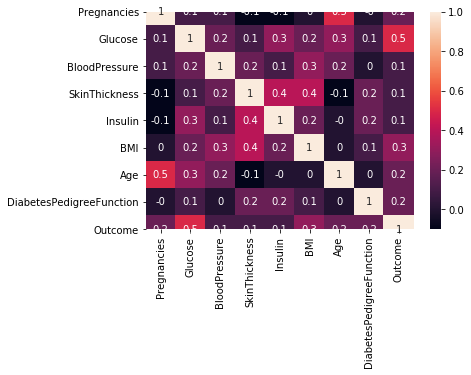

In [11]:
#We can visualize this correlation matrix
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

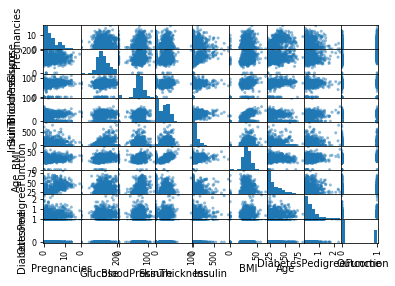

In [12]:
#Another visualization of how each of attribute affect others
from pandas.plotting import scatter_matrix
scatter_matrix(dia_df)
plt.show()

3) VISUALIZATION OF DATASET

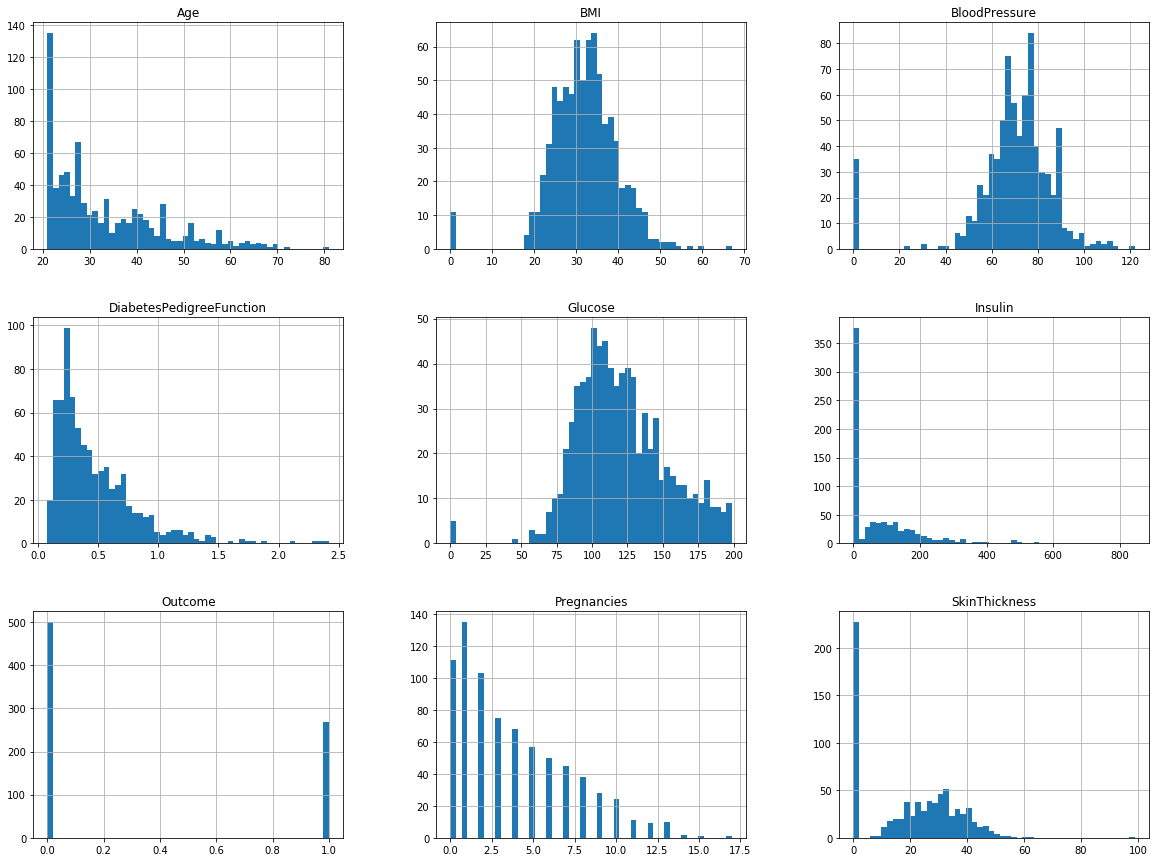

In [13]:
#Histogram of each attribute
import matplotlib.pyplot as plt
dia_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: BMI, Blood Pressure, Diabetes Pedigree Function and skin thickness have a quite normal distribution

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of its indexes and might affect the analysis in future, such as: skin thickness, insulin, glucose, blood pressure... So I have to processed those data for better understanding

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUES

The technique I use here is replacing them with their median value

Our dealing target is BMI, Blood Pressure, Glucose, Insulin, Skin thickness

In [14]:
# Calculate the median value for BMI
median_bmi = dia_df['BMI'].median()
# Substitute it in the BMI column of the dataset where values are 0
dia_df['BMI'] = dia_df['BMI'].replace(
    to_replace=0, value=median_bmi)

In [15]:
#Using the same logic, I deal with Blood Pressure, Glucose, Insulin, Skin thickness
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']:
    median=dia_df[i].median()
    dia_df[i]=dia_df[i].replace(to_replace =0, value=median)

We check these histograms again

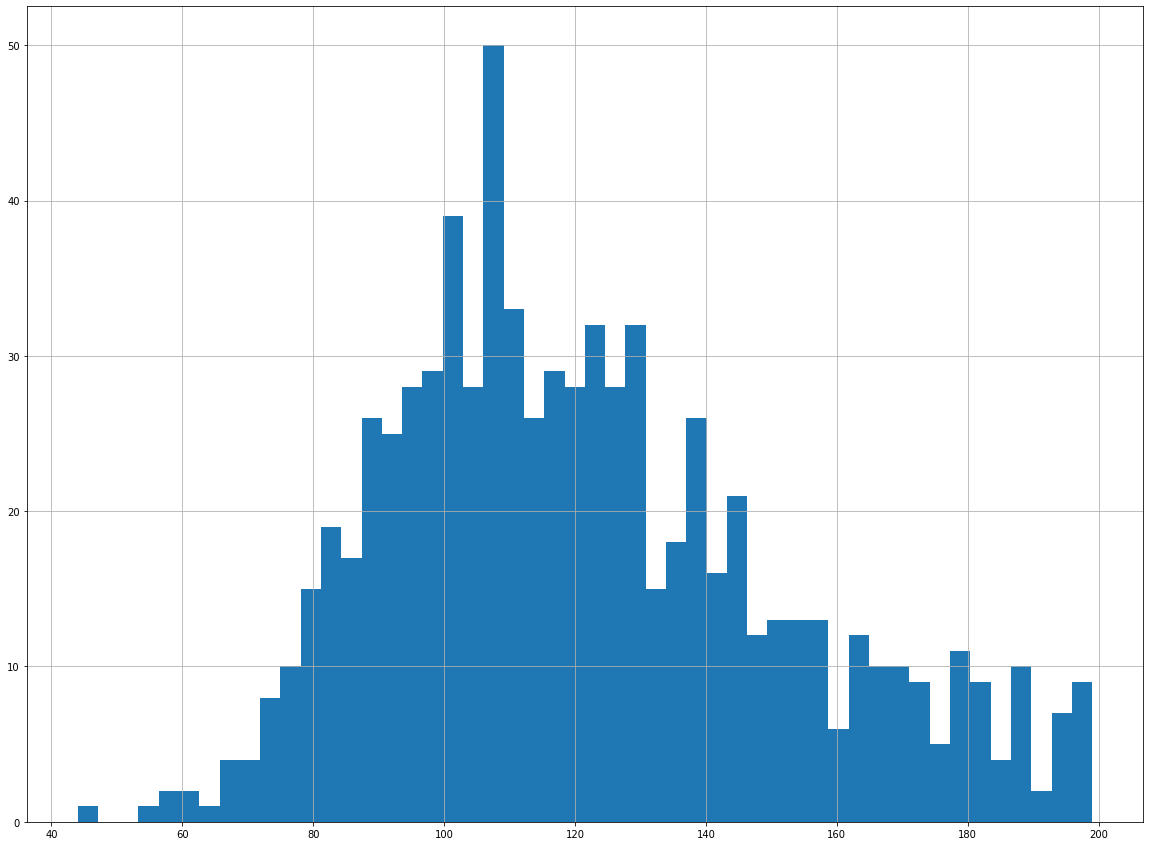

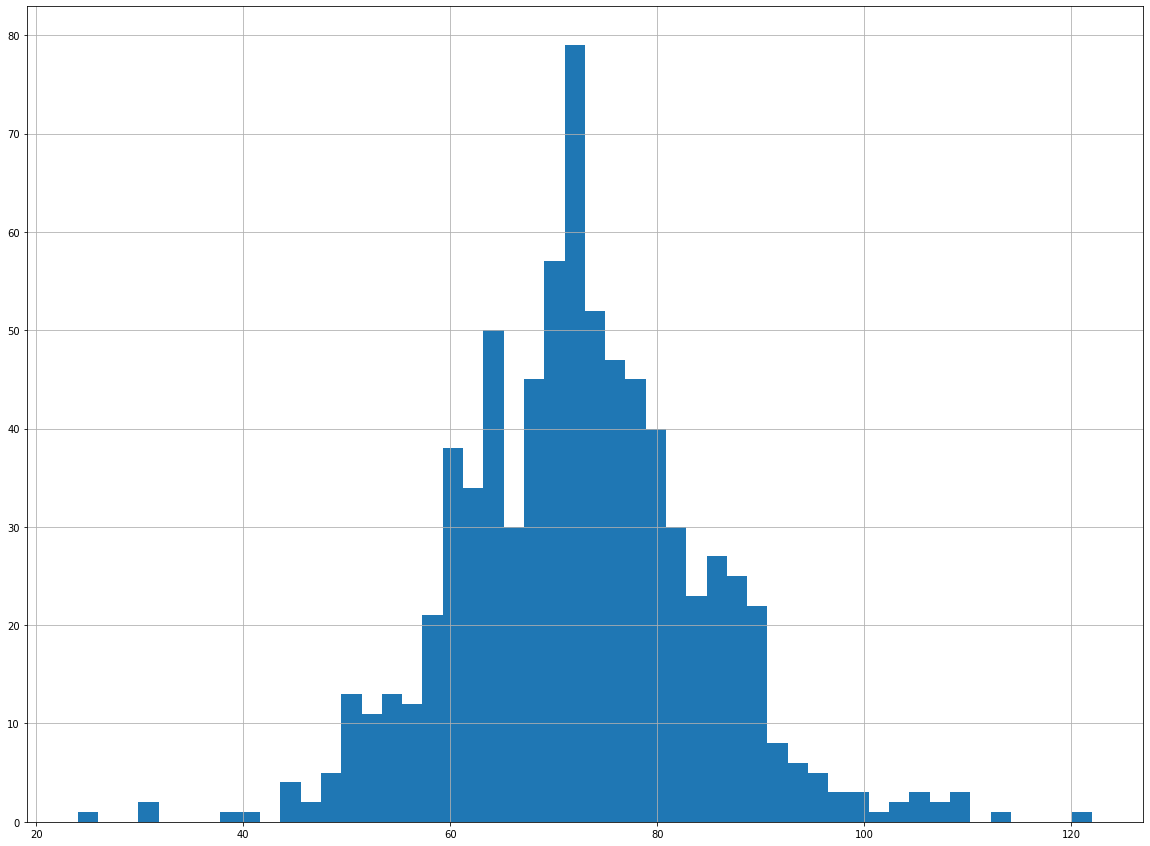

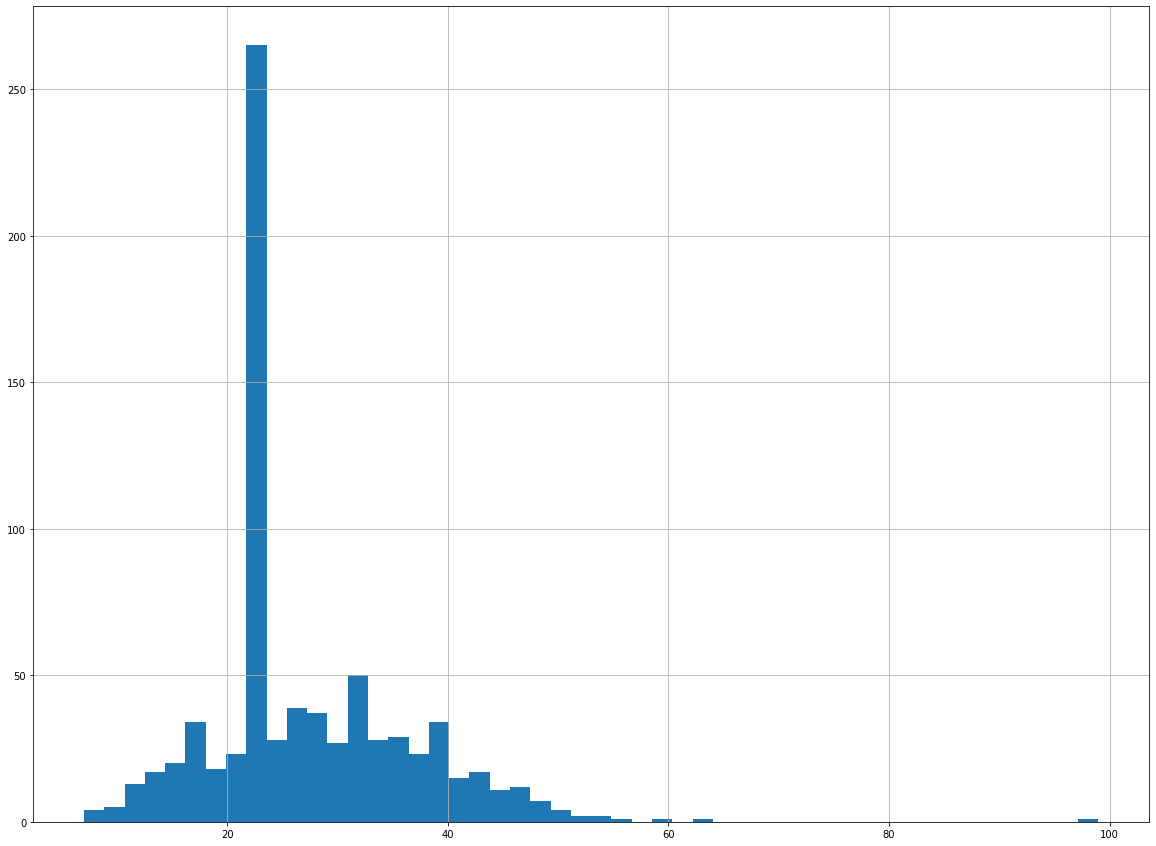

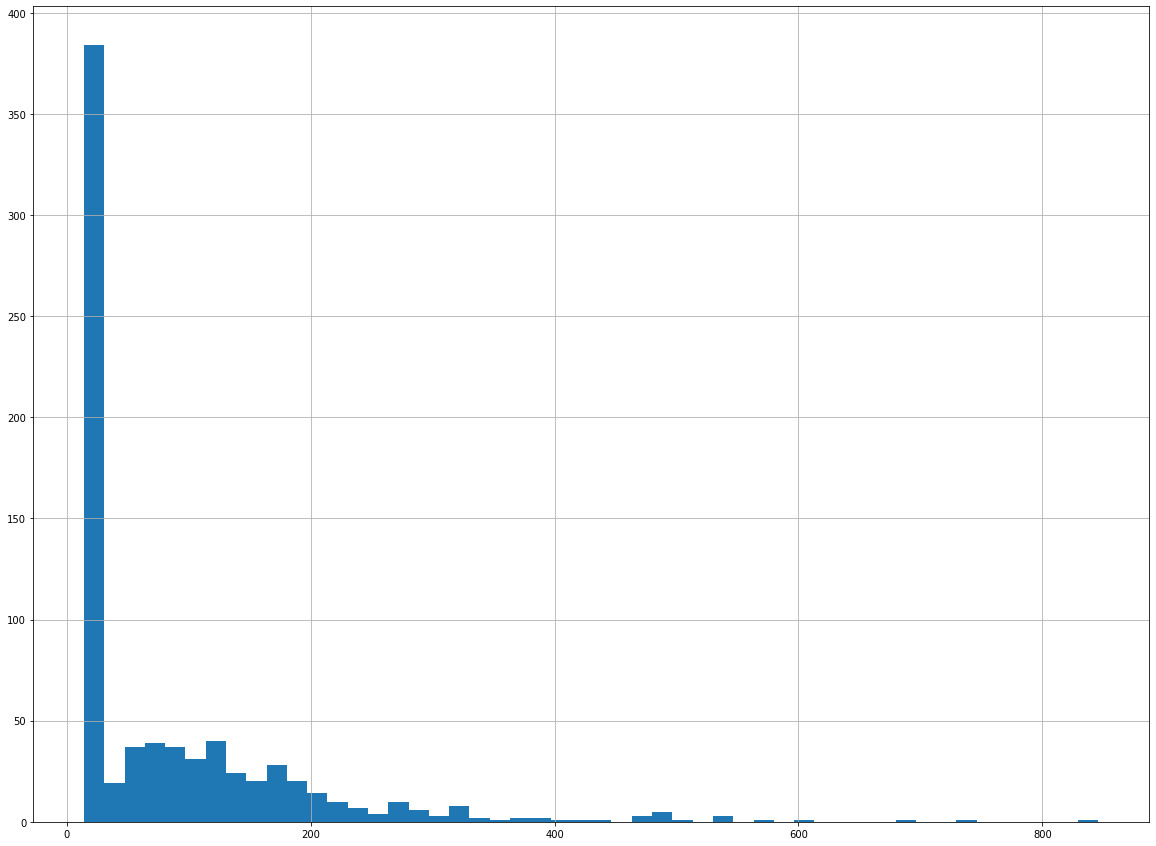

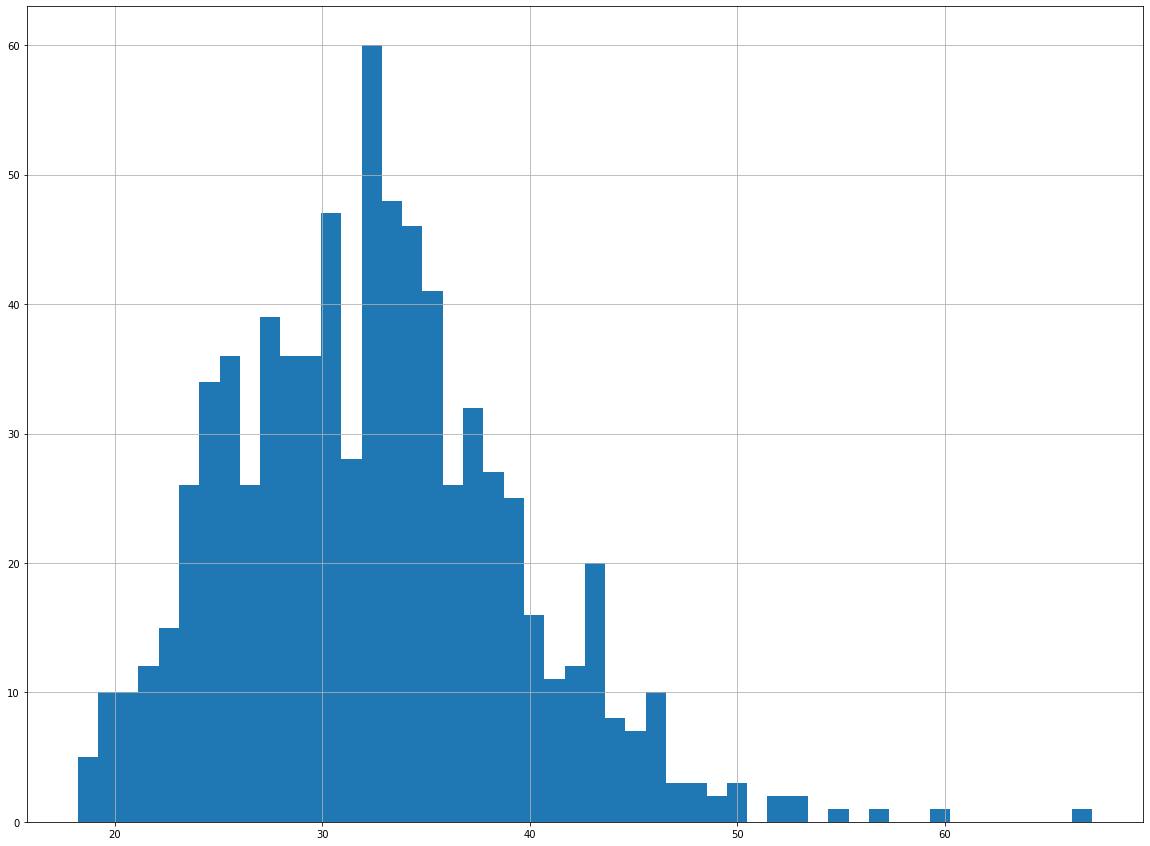

In [16]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    dia_df[i].hist(bins=50, figsize=(20, 15))
    plt.show()

Here all the '0' have been replaced

2) DEALING WITH OUTLIERS

The technique I use here is removing them all from the dataset as they might have negative impact on my classification model

The below codes follow this logic:

a) For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation. 

b) It takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. (here my target is extreme outliers - which are further more than 3 sd from mean value)

c) All(axis=1) ensures that for each row, all column satisfy the constraint. 

d) Change the dataframe based on the result

In [17]:
from scipy import stats
dia_df=dia_df[(np.abs(stats.zscore(dia_df)) < 3).all(axis=1)]

In [18]:
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,30.5,33.6,50,0.627,1
1,1,85,66,29,30.5,26.6,31,0.351,0
2,8,183,64,23,30.5,23.3,32,0.672,1
3,1,89,66,23,94.0,28.1,21,0.167,0
5,5,116,74,23,30.5,25.6,30,0.201,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,63,0.171,0
764,2,122,70,27,30.5,36.8,27,0.340,0
765,5,121,72,23,112.0,26.2,30,0.245,0
766,1,126,60,23,30.5,30.1,47,0.349,1


As the result, there are only 719 attribute vectors left, there are 49 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (6.4% reduction)

In order to avoid miss-indexing, I have to reset index of new dataset

In [19]:
#Create an index array
index=pd.Index([i for i in range(719)])
#Reset the index of dataframe
dia_df.index=index

In [20]:
#Check the dataset reset 
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,30.5,33.6,50,0.627,1
1,1,85,66,29,30.5,26.6,31,0.351,0
2,8,183,64,23,30.5,23.3,32,0.672,1
3,1,89,66,23,94.0,28.1,21,0.167,0
4,5,116,74,23,30.5,25.6,30,0.201,0
...,...,...,...,...,...,...,...,...,...
714,10,101,76,48,180.0,32.9,63,0.171,0
715,2,122,70,27,30.5,36.8,27,0.340,0
716,5,121,72,23,112.0,26.2,30,0.245,0
717,1,126,60,23,30.5,30.1,47,0.349,1


3) FEATURE SCALING

Look back to the statistical description of dataframe

In [21]:
dia_stats=dia_df.describe().round(decimals=2)
dia_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
count,719.00,719.00,719.00,719.00,719.00,719.00,719.00,719.00,719.00
mean,3.84,120.02,72.27,26.88,83.24,32.13,32.92,0.45,0.34
std,3.28,29.64,11.33,8.55,77.21,6.47,11.31,0.28,0.47
min,0.00,44.00,38.00,7.00,15.00,18.20,21.00,0.08,0.00
25%,1.00,99.00,64.00,23.00,30.50,27.40,24.00,0.24,0.00
50%,3.00,115.00,72.00,23.00,30.50,32.00,29.00,0.36,0.00
75%,6.00,138.00,80.00,32.00,120.00,36.10,40.00,0.60,1.00
max,13.00,199.00,108.00,54.00,402.00,52.90,68.00,1.46,1.00


It's obvious that whereas some features have remarkably higher range as: insulin, glucose,... compared to pregnancies are just ranging from 0 to 13. This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason I need to apply a proper scaling system.

The scaling system I choose here is Standardization

In [22]:
#Normalize data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(dia_df.iloc[:,:8])
dia_scaled = scaler.transform(dia_df.iloc[:,:8])

In [23]:
#Scaled values become a 2D array
dia_scaled

array([[ 0.65875016,  0.94471568, -0.02395982, ...,  0.22664342,
         1.51108259,  0.62910294],
       [-0.8671563 , -1.18205666, -0.5540247 , ..., -0.8552006 ,
        -0.17007217, -0.34756579],
       [ 1.26911274,  2.12625587, -0.730713  , ..., -1.36521278,
        -0.08159034,  0.78834241],
       ...,
       [ 0.35356887,  0.03324182, -0.02395982, ..., -0.91702026,
        -0.258554  , -0.7226632 ],
       [-0.8671563 ,  0.20203328, -1.08408958, ..., -0.31427859,
         1.2456371 , -0.3546431 ],
       [-0.8671563 , -0.91199033, -0.20064811, ..., -0.26791385,
        -0.8779268 , -0.47495736]])

In [24]:
#Return this 2D array back to dataframe, however the 'outcome' column is removed
dia_scaled_df = pd.DataFrame(dia_scaled)

In [25]:
#Add the target column(outcome)
dia_scaled_df['Outcome']=dia_df['Outcome']

In [26]:
#Return the original names of these columns
dia_scaled_df.columns=dia_df.columns

In [27]:
#DataFrame showing
dia_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,0.658750,0.944716,-0.023960,0.950543,-0.683459,0.226643,1.511083,0.629103,1
1,-0.867156,-1.182057,-0.554025,0.248378,-0.683459,-0.855201,-0.170072,-0.347566,0
2,1.269113,2.126256,-0.730713,-0.453787,-0.683459,-1.365213,-0.081590,0.788342,1
3,-0.867156,-1.047023,-0.554025,-0.453787,0.139505,-0.623377,-1.054890,-0.998678,0
4,0.353569,-0.135550,0.152728,-0.453787,-0.683459,-1.009750,-0.258554,-0.878364,0
...,...,...,...,...,...,...,...,...,...
714,1.879475,-0.641924,0.329417,2.471901,1.254071,0.118459,2.661346,-0.984524,0
715,-0.561975,0.067000,-0.200648,0.014323,-0.683459,0.721201,-0.523999,-0.386491,0
716,0.353569,0.033242,-0.023960,-0.453787,0.372787,-0.917020,-0.258554,-0.722663,0
717,-0.867156,0.202033,-1.084090,-0.453787,-0.683459,-0.314279,1.245637,-0.354643,1


In [28]:
#The following code checks whether any instances in 'Outcome' attribute is NaN caused by miss-indexing
dia_scaled_df.Outcome.isnull().any()

False

As we can see now all the attributes (except the target column) are successfully standardized (ranging from -1 to 1)

# III) TESTING MULTIPLE MODELS

1) SPLITTING THE DATASET INTO TRAIN AND TEST SET

In this case, I want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

In [29]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(dia_scaled,dia_df.Outcome,test_size=0.25,random_state=5)

2) BUILDING AND TESTING MODELS

Right now, I didnot know which model is the best for our classification, I train and test each of them

To avoid overfitting, I split the dataset into many different folds for training and testing

In [30]:
#Import all the learning algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
#Import some utilities of sklearn to compare algorithms
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [32]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

In [33]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [34]:
#Evaluate each model in turn
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.801537(0.045943)
CARD:0.705171(0.039242)
KNN:0.775507(0.050682)
LDA:0.810832(0.043413)
NB:0.779315(0.048975)
SVM:0.783054(0.063883)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

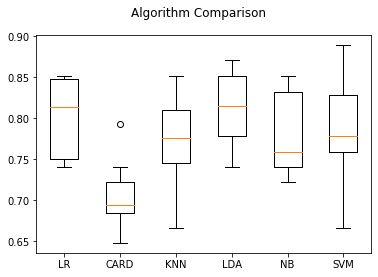

In [35]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (81% vs 80%)

ROC CURVE FOR COMPARISON

In [36]:
#Define x and y axis
x = dia_df.drop(axis = 'columns', columns = 'Outcome')
y_true = np.array(dia_df['Outcome'])

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

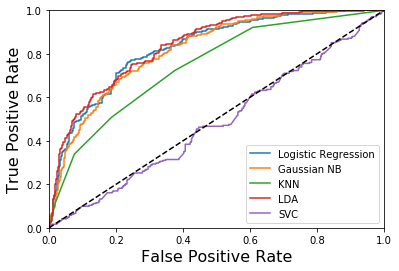

<Figure size 720x432 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

In [37]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)

fpr, tpr, threshold = roc_curve(y_true,y_score_lr)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnbc = GaussianNB()
gnbc.fit(x,y_true)
gnbc_results = cross_val_score(gnbc,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnbc,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='predict_proba',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc[:,1])

# ROC Curve for the models above
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_svc, tpr_svc,label='SVC')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()
plt.show

In [38]:
from sklearn.metrics import roc_auc_score
print ('AUC of Logistic Regression:',roc_auc_score(y_true,y_score_lr))
print ('AUC of GaussianNB:',roc_auc_score(y_true,y_score_gnb[:,1]))
print ('AUC of KNeighborsClassifier:',roc_auc_score(y_true,y_score_knn[:,1]))
print ('AUC of Linear Discriminant Analysis:',roc_auc_score(y_true,y_score_lda[:,1]))
print ('AUC of Support Vector Machine:',roc_auc_score(y_true,y_score_svc[:,1]))

AUC of Logistic Regression: 0.8279103210492575
AUC of GaussianNB: 0.8179479182909716
AUC of KNeighborsClassifier: 0.7451877263198019
AUC of Linear Discriminant Analysis: 0.8388689640833723
AUC of Support Vector Machine: 0.48224093421348996


It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (82.8% vs 83.9%)

# IV) BUILDING THE BEST MODEL FOR PREDICTION

1) ANALYSIS OF 2 MODELS: LOGISTIC REGRESSION AND LINEAR DISCRIMINANT ANALYSIS

The following confusion matrices and classification reports will give you a brief overview of th 2 most effective models 

**** CONFUSION MATRIX ****

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


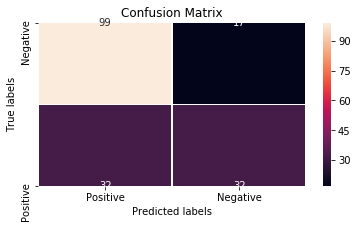

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predictions1=lr.predict(X_test)
cm1=confusion_matrix(Y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [40]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions1).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 32 ; False Positive: 17 ; True Negative: 99 ; False Negative 32


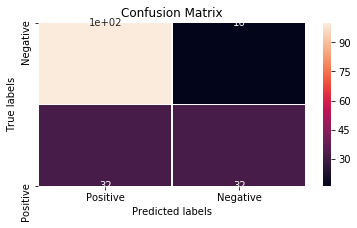

In [41]:
#Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions2=lda.predict(X_test)
cm2=confusion_matrix(Y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [42]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 32 ; False Positive: 16 ; True Negative: 100 ; False Negative 32


**** CLASSIFICATION REPORT ****

In [43]:
from sklearn.metrics import confusion_matrix
#Logistic Regression
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.65      0.50      0.57        64

    accuracy                           0.73       180
   macro avg       0.70      0.68      0.68       180
weighted avg       0.72      0.73      0.72       180



In [44]:
#Linear Discriminant Analysis
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.67      0.50      0.57        64

    accuracy                           0.73       180
   macro avg       0.71      0.68      0.69       180
weighted avg       0.73      0.73      0.72       180



2) FINDING THE BEST MODEL BY GRIDSEARCH

# A- Linear Discriminant Analysis

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'solver': ['svd', 'lsqr', 'eigen']
}

model_lda= LinearDiscriminantAnalysis()

grid_search1 = GridSearchCV(
    model_lda, param_grid1, cv=10, scoring='accuracy')
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

The parameter above is the best parameter for LinearDiscriminantAnalysis model, I will use it the build the model

In [46]:
# Print the bext score found
grid_search1.best_score_

0.8033395176252319

# B-Logistic Regression

a) Penalty testing - advoid overfitting

In [47]:
#RIDGE REGRESSION (L2 PENALTY)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[2,4,6,8,10]}
ridge_reg=GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,Y_train)
print("The best parameter is:",ridge_reg.best_params_)
print("The best score for this penalty is",ridge_reg.best_score_)

The best parameter is: {'alpha': 10}
The best score for this penalty is -0.14910068234386678


In [48]:
#LASSO REGRESSION (L1 PENALTY)
from sklearn.linear_model import Lasso

parameters= {'alpha':[2,4,6,8,10]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train,Y_train)
print("The best parameter is:",lasso_reg.best_params_)
print('The best score for this penalty is: ',lasso_reg.best_score_)

The best parameter is: {'alpha': 2}
The best score for this penalty is:  -0.22171905612198348


The above testing points out that the L2 penalty with alpha=10 would be more effective for our model (-0.22<-0.15)

b) Best parameter for Logistic Regression

In [49]:
param_grid2 = {
    'penalty':['l2'],
    'C':[1.0,10.0,50.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_lr= LogisticRegression()

grid_search2 = GridSearchCV(
    model_lr, param_grid2, cv=10, scoring='accuracy')
grid_search2.fit(X_train, Y_train)
print("The best score for this model is",grid_search2.best_score_)

The best score for this model is 0.8033395176252319


Since 2 models: Linear Discriminant Analysis and Logistic Regression with optimized parameter have the same best accuracy score, we can build either one of them for our prediction

3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

I choose Logistic Regression with L2 penalty and compatable parameter computed above

In [50]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
lr = grid_search2.best_estimator_

In [51]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [52]:
# Train the model
lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

4) MODIFY THE THRESHOLD

In [53]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

This function will return a list of best thresholds for our model. I want to obtain only threshold with recall>=0.9 and f1>=0.7, which can not only maximize the recall, minimize the False Negative problem, but also balance the interrelation between recall and precision

In [54]:
print('Logistic Regression')
optimize_threshold(lr)

Logistic Regression


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: 

[0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26]

In [55]:
print('Linear Discriminant Analysis')
optimize_threshold(lda)

Linear Discriminant Analysis


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: i

[0.16, 0.17, 0.18, 0.19]

Now I just focus on ist of best threholds for Logistic Regression:[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
From the list, we can see optimized thresholds are ranging from 0.22 to 0.3, I pick the median/mean one, which is 0.26 for our model. Then if the probability belongs to '1' class is larger than 0.26, then a person is predicted to be positive with Type II diabete.

# V) MAKE PREDICTIONS

In [56]:
# Create a new (fake) person infomation
new_data = pd.DataFrame([[3, 120, 72, 10, 200, 30, 30,0.4]])
# Scale those values like the others
new_data_scaled = scaler.transform(new_data)

In [57]:
# Modify the threshold
prediction = lr.predict_proba(new_data_scaled)[:,1]

In [58]:
# A value of "1" means that this person is likely to have type 2 diabetes
if prediction > 0.26:
    print("The person is positive with Type II diabetes")
else:
    print("The person is negative with Type II diabetes")

The person is negative with Type II diabetes


Prediction points out that this red with information:(3, 120, 72, 10, 200, 30, 30,0.4) (Pregnancy= 3 times, Glucose level= 120mg/dL, BloodPressure= 72mmHg, SkinThickness =10mm, Insulin level= 200mIU/L, BMI= 30, Age= 30 years, DiabetesPedigreeFunction= 0.4) is diagnosed 'negative' towards type II diabetes

In [59]:
#Define a function using the logic above for quicker and more convenient prediction:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > 0.26:
        print("The person is positive with Type II diabetes")
    else:
        print("The person is negative with Type II diabetes")

**** Warning: The data passed in the function defined has to be a dataframe****

Let's check again with data of another person, using our function:

In [60]:
data=pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
prediction(data)

The person is positive with Type II diabetes


Our prediction model points out that this red with information: (6, 168, 72, 35, 0, 43.6, 0.627, 65) (Pregnancy= 6 times, Glucose level= 168mg/dL, BloodPressure= 72mmHg, SkinThickness =35mm, Insulin level= 0mIU/L, BMI= 43.6, Age= 65 years, DiabetesPedigreeFunction= 0.627) is diagnosed 'negative' towards type II diabetes

# VI) CONCLUSION

I finally find a score of 80.3% using Logistic Regression algorithm with Ridge Penalty and parameters optimisation. Please note that there may be still space for further analysis and optimisation. Training a machine learning model to solve a problem with a specific dataset is a test/fail/improve process. And according to our knowledge in Data Science subject until now, this is the best model achieved.

# ACKNOWLEDGEMENT

During project, there are a lot of things I were not clear about or having trouble dealing with machine learning techniques. Therefore, I want to express a huge gratefulness to listed but not limited sources that contribute to this success:

1) https://towardsdatascience.com

2) https://scikit-learn.org

3) https://pandas.pydata.org

4) https://www.datacamp.com

As well as many discussion forums, topics,... that give us a helping hand when encoutering many difficulties during this study.